In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from skimage.measure import label, regionprops, find_contours

In [2]:
train_data_fp = "./sample_data/raw_train/S1A_EW_GRDM_1SDH_20180721T120156_20180721T120256_022892_027B98_56D9_icechart_cis_SGRDIMID_20180721T1203Z_pl_a.nc"
data = xr.open_dataset(train_data_fp)
data

<xarray.Dataset>
Dimensions:                  (sar_lines: 9985, sar_samples: 10372,
                              sar_grid_points: 441, polygon_codes: 44,
                              2km_grid_lines: 199, 2km_grid_samples: 207)
Coordinates:
  * polygon_codes            (polygon_codes) object 'poly_id;CT;CA;SA;FA;CB;S...
Dimensions without coordinates: sar_lines, sar_samples, sar_grid_points,
                                2km_grid_lines, 2km_grid_samples
Data variables: (12/32)
    nersc_sar_primary        (sar_lines, sar_samples) float32 ...
    nersc_sar_secondary      (sar_lines, sar_samples) float32 ...
    polygon_icechart         (sar_lines, sar_samples) float32 ...
    distance_map             (sar_lines, sar_samples) float32 ...
    sar_grid_line            (sar_grid_points) float64 ...
    sar_grid_sample          (sar_grid_points) float64 ...
    ...                       ...
    u10m_rotated             (2km_grid_lines, 2km_grid_samples) float64 ...
    v10m_rotated             (2km_grid_lines, 2km_grid_samples) float64 ...
    t2m                      (2km_grid_lines, 2km_grid_samples) float64 ...
    skt                      (2km_grid_lines, 2km_grid_samples) float64 ...
    tcwv                     (2km_grid_lines, 2km_grid_samples) float64 ...
    tclw                     (2km_grid_lines, 2km_grid_samples) float64 ...
Attributes:
    title:                               Training data file from AI4Arctic_CC...
    geometric_info:                      All variables are gridded to match S...
    sar_denoise_by_nersc_documentation:  Thermal Denoising of Cross-Polarized...

Ice chart codes are mapped to indices with the following 'polygon codes' LUT. These indices are converted to SIC, SOD and FLOE attributes in the prepared dataset; see https://github.com/astokholm/AI4ArcticSeaIceChallenge/blob/main/convert_raw_icechart.py.

In [3]:
data.polygon_codes

<xarray.DataArray 'polygon_codes' (polygon_codes: 44)>
array(['poly_id;CT;CA;SA;FA;CB;SB;FB;CC;SC;FC;CN;CD;CF;POLY_TYPE',
       '26;91;-9;93;08;-9;-9;-9;-9;-9;-9;-9;-9;08-9;I',
       '28;90;-9;93;07;-9;-9;-9;-9;-9;-9;-9;-9;07-9;I',
       '29;92;30;95;05;70;93;08;-9;-9;-9;-9;-9;08-9;I',
       '30;70;-9;93;07;-9;-9;-9;-9;-9;-9;-9;-9;07-9;I',
       '31;20;-9;93;05;-9;-9;-9;-9;-9;-9;-9;-9;05-9;I',
       '32;50;-9;93;06;-9;-9;-9;-9;-9;-9;95;-9;06-9;I',
       '34;30;-9;93;05;-9;-9;-9;-9;-9;-9;-9;-9;05-9;I',
       '35;90;-9;93;06;-9;-9;-9;-9;-9;-9;-9;-9;06-9;I',
       '36;30;-9;93;05;-9;-9;-9;-9;-9;-9;95;-9;05-9;I',
       '38;91;-9;93;06;-9;-9;-9;-9;-9;-9;-9;-9;06-9;I',
       '39;91;-9;93;07;-9;-9;-9;-9;-9;-9;95;-9;07-9;I',
       '41;91;-9;93;08;-9;-9;-9;-9;-9;-9;-9;-9;08-9;I',
       '44;90;-9;93;06;-9;-9;-9;-9;-9;-9;95;-9;06-9;I',
       '45;91;-9;93;06;-9;-9;-9;-9;-9;-9;-9;-9;06-9;I',
       '46;91;90;95;06;10;93;06;-9;-9;-9;-9;-9;06-9;I',
       '47;80;20;95;06;60;93;06;-9;-9;-9;-9;-9;06-9;I',
       '49;80;20;95;06;60;93;06;-9;-9;-9;-9;-9;06-9;I',
       '50;90;20;95;06;70;93;06;-9;-9;-9;-9;-9;06-9;I',
       '51;20;-9;93;05;-9;-9;-9;-9;-9;-9;-9;-9;05-9;I',
       '52;20;-9;93;05;-9;-9;-9;-9;-9;-9;95;-9;05-9;I',
       '53;20;-9;93;05;-9;-9;-9;-9;-9;-9;-9;-9;05-9;I',
       '54;20;-9;93;05;-9;-9;-9;-9;-9;-9;95;-9;05-9;I',
       '55;80;20;95;06;60;93;06;-9;-9;-9;-9;-9;06-9;I',
       '56;91;-9;93;07;-9;-9;-9;-9;-9;-9;95;-9;07-9;I',
       '57;80;-9;93;06;-9;-9;-9;-9;-9;-9;95;-9;06-9;I',
       '59;91;-9;93;07;-9;-9;-9;-9;-9;-9;95;-9;07-9;I',
       '60;60;-9;93;05;-9;-9;-9;-9;-9;-9;95;-9;05-9;I',
       '61;20;-9;93;05;-9;-9;-9;-9;-9;-9;95;-9;05-9;I',
       '64;20;-9;93;05;-9;-9;-9;-9;-9;-9;95;-9;05-9;I',
       '65;20;-9;93;05;-9;-9;-9;-9;-9;-9;95;-9;05-9;I',
       '66;60;-9;93;05;-9;-9;-9;-9;-9;-9;95;-9;05-9;I',
       '68;92;-9;95;08;-9;-9;-9;-9;-9;-9;-9;-9;08-9;I',
       '69;10;-9;95;-9;-9;-9;-9;-9;-9;-9;-9;-9;20-9;I',
       '70;92;-9;95;08;-9;-9;-9;-9;-9;-9;-9;-9;08-9;I',
       '71;92;-9;95;08;-9;-9;-9;-9;-9;-9;-9;-9;08-9;I',
       '72;92;-9;95;08;-9;-9;-9;-9;-9;-9;-9;-9;08-9;I',
       '73;92;-9;95;08;-9;-9;-9;-9;-9;-9;-9;-9;08-9;I',
       '74;30;-9;93;06;-9;-9;-9;-9;-9;-9;95;-9;06-9;I',
       '75;30;20;95;06;10;93;06;-9;-9;-9;-9;-9;06-9;I',
       '76;02;-9;98;10;-9;-9;-9;-9;-9;-9;-9;-9;10-9;W',
       '77;30;-9;93;06;-9;-9;-9;-9;-9;-9;95;-9;06-9;I',
       '81;30;-9;93;05;-9;-9;-9;-9;-9;-9;-9;-9;05-9;I',
       '84;02;-9;98;10;-9;-9;-9;-9;-9;-9;-9;-9;10-9;W'], dtype=object)
Coordinates:
  * polygon_codes  (polygon_codes) object 'poly_id;CT;CA;SA;FA;CB;SB;FB;CC;SC...
Attributes:
    icechart_id:  cis_SGRDIMID_20180721T1203Z_pl_a

Ice chart polygons are provided in a pixelwise manner coinciding with the 40m-resolution SAR imagery. Each pixel is assigned a polygon index.

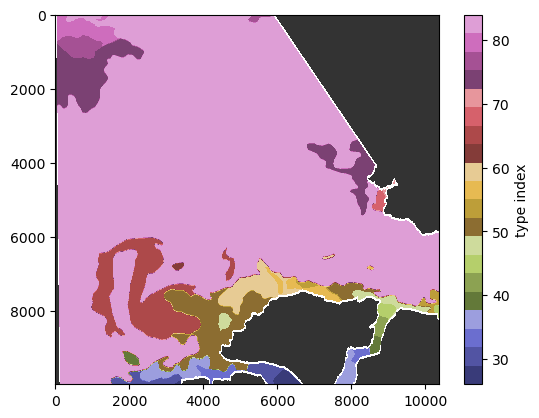

In [4]:
plt.imshow(data.polygon_icechart.values, cmap='tab20b')
plt.colorbar(label='type index')
mask = np.zeros(data.polygon_icechart.values.shape)
mask[~np.isnan(data.polygon_icechart.values)] = np.nan
plt.imshow(mask, cmap='gray', alpha=0.8)
plt.show()

Visualizing SAR images

In [5]:
"""
sar_grid_line matches lat/lon grid points to a SAR line (each line is a row of SAR samples in range direction).

Getting lat/lon axis labels for general case is tough;
  - image may appear upside down / flipped (e.g. descending pass left-looking)
  - track may not be directly north/south (lines of latitude & longitude slanted across image extent)

Left as todo.
"""
start_lats = data.sar_grid_latitude.values[data.sar_grid_line.values==0]
end_lats = data.sar_grid_latitude.values[data.sar_grid_line.values==data.sar_grid_line.values[-1]]

start_lons = data.sar_grid_longitude.values[data.sar_grid_line.values==0]
end_lons = data.sar_grid_longitude.values[data.sar_grid_line.values==data.sar_grid_line.values[-1]]

lat_min = np.minimum(np.min(start_lats), np.min(end_lats))
lat_max = np.maximum(np.max(start_lats), np.max(end_lats))

lon_min = np.minimum(np.min(start_lons), np.min(end_lons))
lon_max = np.maximum(np.max(start_lons), np.max(end_lons))

print(f"Lat min: {lat_min}, max: {lat_max}")
print(f"Lon min: {lon_min}, max: {lon_max}")

Lat min: 72.03969730552608, max: 76.60299281548804
Lon min: -83.35240578151323, max: -66.10105370578512


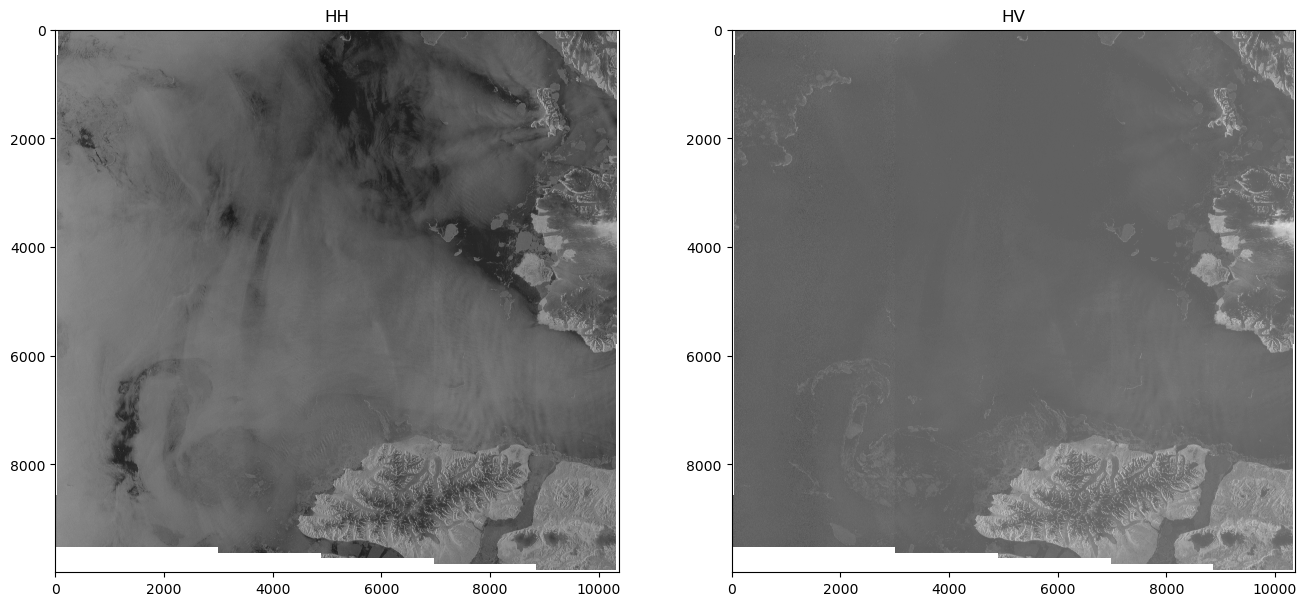

In [6]:
fig,axs = plt.subplots(1, 2, figsize=(16, 8))

N_xticks = 6
N_yticks = 6

y_dim, x_dim = data.nersc_sar_primary.shape

x_scale = start_lons.size / N_xticks
y_scale = start_lats.size / N_yticks

axs[0].imshow(data.nersc_sar_primary.values, cmap='gray')
# axs[0].imshow(data.polygon_icechart.values, cmap='tab20b', alpha=0.2)
axs[0].set_title("HH")

axs[1].imshow(data.nersc_sar_secondary, cmap='gray')
# axs[1].imshow(data.polygon_icechart.values, cmap='tab20b', alpha=0.2)
axs[1].set_title("HV")

# Lat/lon tick labels
# for ax in axs:
#     ax.set_xticks(np.linspace(0, x_dim, N_xticks))
#     ax.set_xticklabels([np.round(start_lons[int(i*x_scale)], 1) for i in np.arange(0, N_xticks)])
#     ax.set_yticks(np.linspace(0, y_dim, N_yticks))
#     ax.set_yticklabels([np.round(start_lats[int(i*y_scale)], 1) for i in np.arange(0, N_yticks)])


plt.show()

Visualizing Ice Chart Overlaid on SAR Images

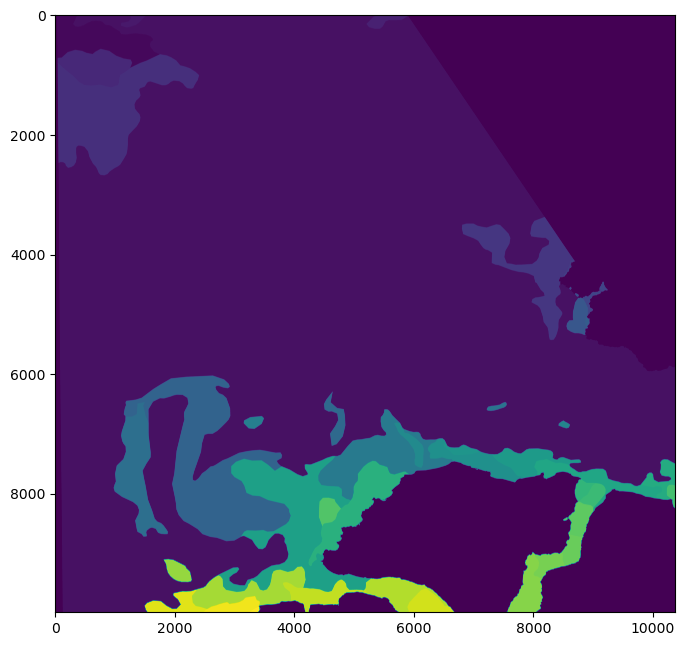

In [7]:
# Can first use skimage's label API to segment chart polygons by index

chart_indcs = np.copy(data.polygon_icechart.values)
chart_indcs[np.isnan(chart_indcs)] = -1

label_image = label(chart_indcs, background=-1)

fig,ax = plt.subplots(1, figsize=(8, 8))
ax.imshow(label_image)
plt.show()

In [8]:
# Next retrieve contours for each segment - TODO: this is slow as hell, implement a quicker way with regionprops.
all_contours = []

for val in np.unique(label_image):
    contours = find_contours(label_image, level=val)
    all_contours += contours


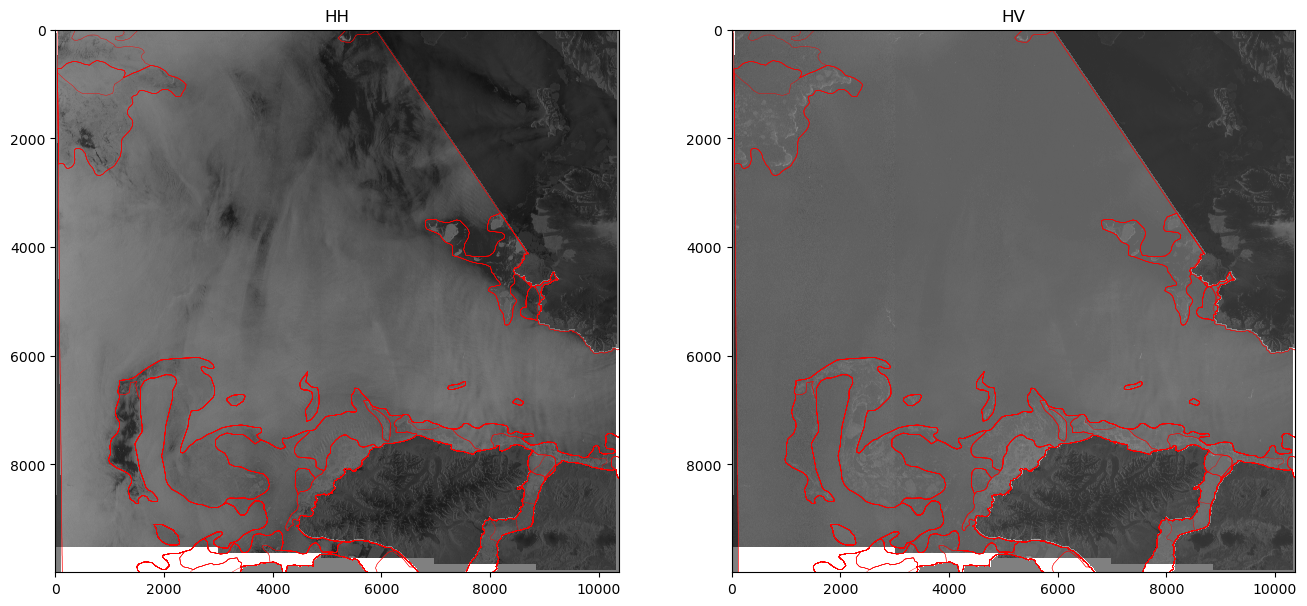

In [9]:
# Overlay polygon contours on SAR images

fig, axs = plt.subplots(1, 2, figsize=(16,8))
axs[0].imshow(data.nersc_sar_primary.values, cmap='gray')
axs[1].imshow(data.nersc_sar_secondary.values, cmap='gray')
for contour in all_contours:
    axs[0].plot(contour[:, 1], contour[:, 0], linewidth=0.3, color='red')
    axs[1].plot(contour[:, 1], contour[:, 0], linewidth=0.3, color='red')

axs[0].set_title("HH")
axs[1].set_title("HV")

for ax in axs:
    ax.imshow(mask, cmap='gray', alpha=0.5)

plt.show()